In [1]:
# importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
# Data Collection and Processing

In [5]:
# loading the csv data to a pandas Dataframe
gold_data = pd.read_csv('Downloads/archive/gld_price_data.csv')

In [6]:
# print first 5 rows of the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [9]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
# cheking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
# Correlation :
# 1. Positive Correlation
# 2. Negative correlation

In [14]:
correlation = gold_data.corr()

<AxesSubplot:>

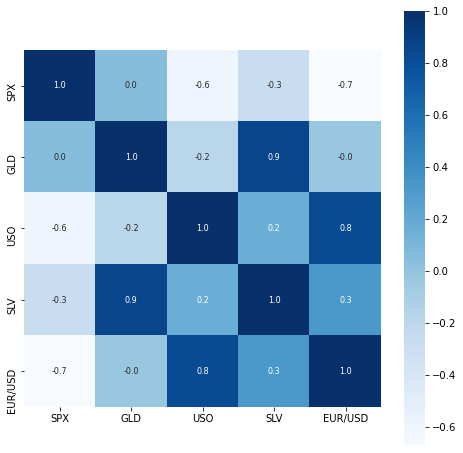

In [16]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [18]:
# correlation values of GLG
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

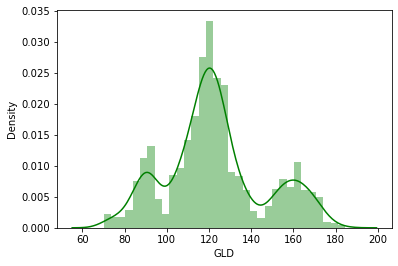

In [19]:
# checking the destribution of GLD price
sns.distplot(gold_data['GLD'], color="green")

Splitting the Features and Target

In [21]:
X = gold_data.drop(["Date", "GLD"], axis=1)
Y = gold_data["GLD"]

In [22]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Traning data and Test data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Traning : Random Forest Regressor

In [25]:
regressor = RandomForestRegressor(n_estimators=100)

In [27]:
# traning the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [28]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [29]:
print(test_data_prediction)

[168.37469913  82.03470002 116.24569999 127.70060086 120.71180153
 154.7664976  150.41189831 126.06630032 117.52669877 125.92070091
 116.82080071 171.57640045 142.17059909 167.59679836 115.14050018
 117.55700046 138.3906032  170.07070057 159.24810326 155.76649915
 155.10970014 124.98509976 176.47269951 158.00080293 125.22860037
  93.80469948  77.15860037 120.39959998 119.0847994  167.39910017
  88.02590012 125.12680009  91.33390081 117.6325002  121.17429921
 136.14590047 115.41520116 114.97130077 148.58959951 107.14680106
 104.5286026   87.26279792 126.54440015 117.61090063 153.35669873
 119.71140003 108.38739985 108.3690988   93.11750032 127.08569783
  75.51770018 113.54789896 121.3726     111.16039928 118.94119904
 120.94289936 159.72869958 168.6608012  146.91429668  85.9831988
  94.32880039  86.83299886  90.47949989 118.96730078 126.35440039
 127.51799983 167.95119946 122.24319964 117.35619878  98.4572006
 168.53320027 143.16069861 131.58380248 121.17760197 121.61799892
 119.6977004

In [30]:
# R square error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R square error : ", error_score)

R square error :  0.9889339174918902


Compare the Actual values and Predicted values in a Plot

In [31]:
Y_test = list(Y_test)

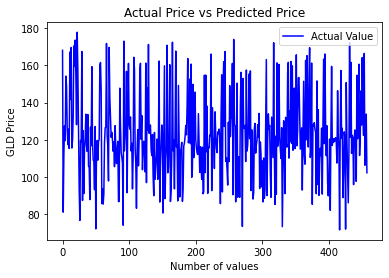

In [33]:
plt.plot(Y_test, color="blue", label="Actual Value")
# plt.plot(test_data_prediction, color="green", label="Predicted Value")
plt.title('Actual Price vs Predicted Price')
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()

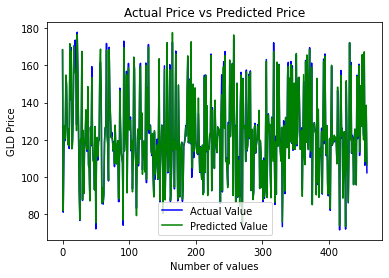

In [34]:
plt.plot(Y_test, color="blue", label="Actual Value")
plt.plot(test_data_prediction, color="green", label="Predicted Value")
plt.title('Actual Price vs Predicted Price')
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()